前面的課

https://github.com/vcdemy/20240328/blob/main/20240328%E7%AD%86%E8%A8%98.ipynb

https://github.com/vcdemy/20240411/blob/main/20240411.ipynb

https://github.com/vcdemy/20240418/blob/main/20240418%E7%AD%86%E8%A8%98.ipynb

https://github.com/vcdemy/20240425/blob/main/20240425%E7%AD%86%E8%A8%98.ipynb


* numpy
    * 基本運算
    * indexing
    * slicing
    * clip
    * ravel
* 影像處理基本操作
    * 開啟檔案
        * PIL
        * skimage
        * cv2
    * 圖片縮放
        * thumbnail
        * resize
    * 圖片旋轉
    * 灰階轉換
* 影像處理再階一點點
    * 裁切
    * 貼圖
    * 嵌字
    * 圖層操作
    * histogram
    * thresholding

In [ ]:
# 圖
lena_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
moon_url = "https://upload.wikimedia.org/wikipedia/commons/e/e1/FullMoon2010.jpg"

In [ ]:
import numpy as np

# numpy

## 四則運算

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([7, 8, 9, 10])

In [ ]:
a + b

## indexing

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
a[2]

In [ ]:
a = np.array([1, 2, 3, 4, 5])

In [ ]:
start = 2 - 1
end = 4

a[start: end]
a[1: 4]
a[1: 1 + 3]
# 都一樣

In [ ]:
img = np.arange(3*3*3).reshape((3, 3, 3))
img

In [ ]:
red = img[:, :, 0]
red

## Clip

In [ ]:
a = np.arange(100)
a

In [ ]:
np.clip(a, a_min=30, a_max=70)

## ravel 

In [ ]:
img = np.arange(3*3*3).reshape((3, 3, 3))
img

In [ ]:
img.ravel()

In [ ]:
img.reshape((27,))

# 影像處理的基本操作

## 開啟檔案

In [ ]:
!curl -O https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
!curl -O https://upload.wikimedia.org/wikipedia/commons/e/e1/FullMoon2010.jpg

In [ ]:
使用任意方法開啟檔案
opencv
pillow
skimage

In [ ]:
# pillow
from PIL import Image
pil_img = Image.open('lena.png')

In [ ]:
# open cv
import cv2
cv_img = cv2.imread('lena.png')

In [ ]:
# sci-kit image
import skimage as ski
sk_img = ski.io.imread('lena.png')

## 顯示圖案

In [ ]:
使用任意方法顯示圖案
jupyter, cv2, matplotlib, plotly express

In [ ]:
# jupyter, 只適用 pillow 的圖檔
pil_img

In [ ]:
# open cv 的作法, 適用於 np.array 
cv2.imshow('title', cv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# matplotlib
from matplotlib import pyplot as plt
plt.imshow(sk_img)

In [ ]:
# plotly express
import plotly.express as px
px.imshow(sk_img)

# 圖片縮放

In [75]:
pil_pen = Image.open('pen.jpg')

In [74]:
pen_moon.size

(1200, 1800)

(50, 50)


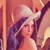

In [68]:
img = pen_.copy()
size = (50, 50)
img.thumbnail(size)
print(img.size)
img



* 影像處理基本操作
    * 圖片縮放
        * thumbnail
        * resize
    * 圖片旋轉
    * 灰階轉換
* 影像處理再階一點點
    * 裁切
    * 貼圖
    * 嵌字
    * 圖層操作
    * histogram
    * thresholding